### K-Nearest Neighbor
- Predicts based on the nearest data point without specific prediction model
- Non-parametric model/ instance-based model
- Supports both classification and regression 

In [5]:
import pandas as pd
import numpy as np
import multiprocessing
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [71]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

### KNN Classification
- returns nearest _k_ data points that is close to the input data points
- predicts a class that contains the largest data point

In [10]:
iris = load_iris()

In [11]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df # Four features / three classes

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [14]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
print('training data score : ', model.score(X_train, y_train))
print('test data score : ', model.score(X_test, y_test))

training data score :  0.9833333333333333
test data score :  0.9666666666666667


In [17]:
# w/scaler
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [18]:
print('training data score : ', model.score(X_train_scale, y_train))
print('test data score : ', model.score(X_test_scale, y_test))

training data score :  0.9583333333333334
test data score :  0.9


In [19]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.00100231, 0.00100231, 0.00100231, 0.00100231, 0.00100231]),
 'score_time': array([0.00199842, 0.00199842, 0.00199842, 0.00199842, 0.00199842]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [20]:
param_grid = [{'n_neighbors':  [3, 5, 7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [21]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

In [22]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [23]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [24]:
print('GridSearchCV best score: ', gs.best_score_)

GridSearchCV best score:  0.9800000000000001


In [33]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

### Dimension reduction

In [27]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [28]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-14.101717,21.513342,0
1,-15.373045,24.081072,0
2,-14.134205,24.007875,0
3,-14.557488,24.446611,0
4,-13.665471,21.571669,0
...,...,...,...
145,5.204614,-15.990051,2
146,6.860863,-13.132662,2
147,5.641992,-15.104133,2
148,7.004711,-16.783022,2


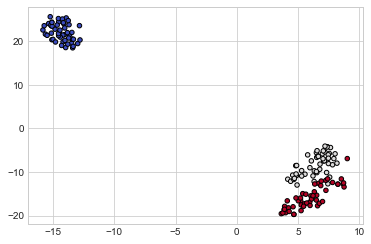

In [29]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20,
            edgecolors='k')

In [30]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

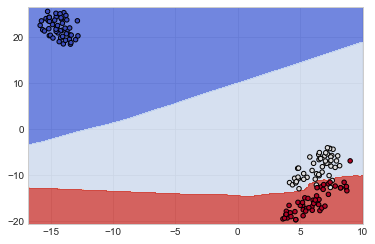

In [35]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20,
           edgecolors='k')

### Breast cancer data

In [36]:
cancer = load_breast_cancer()

In [37]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [38]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
cancer_train_df = pd.DataFrame(X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.320100,0.159500,0.1648,0.05525,...,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,0
1,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,0.05025,...,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111,0
2,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789,0
3,12.230,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.041070,0.1979,0.06013,...,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174,1
4,15.500,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.084810,0.2085,0.06864,...,27.65,157.10,1748.0,0.15170,0.40020,0.42110,0.21340,0.3003,0.10480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522,1
451,13.280,20.28,87.32,545.2,0.10410,0.14360,0.098470,0.061580,0.1974,0.06782,...,28.00,113.10,907.2,0.15300,0.37240,0.36640,0.14920,0.3739,0.10270,0
452,12.890,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915,1
453,9.668,18.10,61.06,286.3,0.08311,0.05428,0.014790,0.005769,0.1680,0.06412,...,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,1


In [41]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [42]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
print('training data score : ', model.score(X_train, y_train))
print('test data score : ', model.score(X_test, y_test))

training data score :  0.9472527472527472
test data score :  0.956140350877193


In [45]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [46]:
print('training data score : ', model.score(X_train_scale, y_train))
print('test data score : ', model.score(X_test_scale, y_test))

training data score :  0.9802197802197802
test data score :  0.9649122807017544


In [47]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

In [48]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.0s finished


{'fit_time': array([0.00200081, 0.00700092, 0.00200081, 0.00200081, 0.00200248]),
 'score_time': array([0.03600526, 0.03101397, 0.03700709, 0.04001141, 0.0340116 ]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [49]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())])

In [51]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [52]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

In [53]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [54]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [55]:
print('GridSearchCV test score: ', gs.best_score_)

GridSearchCV test score:  0.9701288619779538


In [60]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [64]:
cancer_comp_df = pd.DataFrame(X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,16.620388,30.540417,0
1,14.482576,29.529501,0
2,16.008236,24.953798,0
3,-14.178744,-8.395209,0
4,18.126614,23.960451,0
...,...,...,...
564,13.322983,30.723610,0
565,16.510691,25.912485,0
566,19.971399,6.628827,0
567,15.751068,27.430147,0


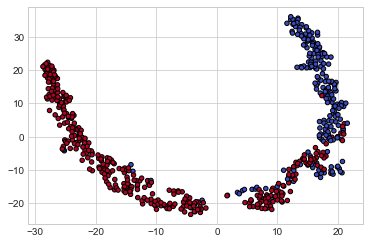

In [65]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)

In [66]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

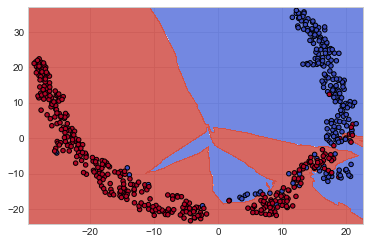

In [70]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)

### Wine data

In [72]:
wine = load_wine()

In [74]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [75]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
wine_train_df = pd.DataFrame(X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0,2
1,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
2,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0,0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
138,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1
139,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
140,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0,0


In [77]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
print('training data score : ', model.score(X_train, y_train))
print('test data score : ', model.score(X_test, y_test))

training data score :  0.8380281690140845
test data score :  0.6388888888888888


In [79]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [80]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [81]:
print('training data score : ', model.score(X_train_scale, y_train))
print('test data score : ', model.score(X_test_scale, y_test))

training data score :  0.9788732394366197
test data score :  1.0


In [82]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

In [83]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    3.1s finished


{'fit_time': array([0.00099969, 0.00199986, 0.00200176, 0.00099969, 0.00099969]),
 'score_time': array([0.00300193, 0.0010016 , 0.00200057, 0.00200176, 0.00200176]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [85]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())])

In [86]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [87]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

In [88]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [89]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [90]:
print('GridSearchCV test score: ', gs.best_score_)

GridSearchCV test score:  0.9665079365079364


In [91]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [92]:
wine_comp_df = pd.DataFrame(X_comp)
wine_comp_df['target'] = y
wine_comp_df

,0,1,target
0,6.573430,-8.852109,0
1,6.925853,-8.168324,0
2,8.187757,-10.402880,0
3,9.650965,-12.822619,0
4,1.536273,-1.824797,0
...,...,...,...
173,1.882381,-1.555916,2
174,2.092647,-1.940022,2
175,3.590283,-4.100873,2
176,3.533668,-4.339043,2


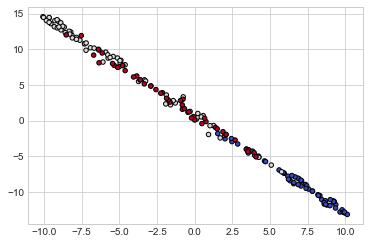

In [93]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)

In [94]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

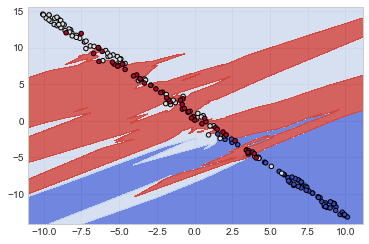

In [95]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)

### KNN Regression
- Neighboring data points are used for the prediction same as KNN classification 
- The average of neighboring data points are the result of prediction

In [96]:
boston = load_boston()

C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [97]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target

In [98]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [99]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [101]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [102]:
print('training data score : ', model.score(X_train, y_train))
print('test data score : ', model.score(X_test, y_test))

training data score :  0.7133958969515908
test data score :  0.5318195663360878


In [103]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [104]:
print('training data score : ', model.score(X_train_scale, y_train))
print('test data score : ', model.score(X_test_scale, y_test))

training data score :  0.8489388925317148
test data score :  0.7138773127463114


In [106]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor())

In [107]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.00200057, 0.00200057, 0.00099993, 0.00200152, 0.00099945]),
 'score_time': array([0.00200033, 0.00200033, 0.00200129, 0.00200009, 0.0010004 ]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [108]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())])

In [109]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [110]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

In [111]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [112]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [113]:
print('GridSearchCV test score: ', gs.best_score_)

GridSearchCV test score:  0.4973060611762845


In [117]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [118]:
boston_comp_df = pd.DataFrame(X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-20.988926,24.0
1,-46.200058,21.6
2,-43.851284,34.7
3,-43.218159,33.4
4,-43.847881,36.2
...,...,...
501,-28.496576,22.4
502,-29.154743,20.6
503,-29.957277,23.9
504,-29.913565,22.0


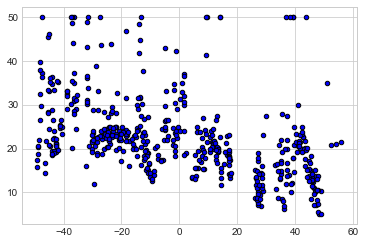

In [119]:
plt.scatter(X_comp,y, c='b', cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)

In [120]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

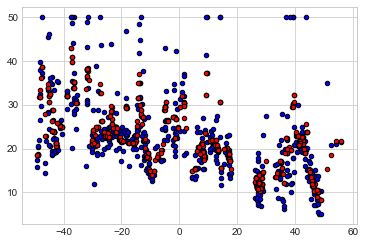

In [121]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)

### California data

In [122]:
cali = fetch_california_housing()

In [124]:
cali_df = pd.DataFrame(data=cali.data, columns=cali.feature_names)
cali_df['target'] = cali.target

In [125]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [126]:
X, y = cali.data, cali.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [127]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [128]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [129]:
print('training data score : ', model.score(X_train, y_train))
print('test data score : ', model.score(X_test, y_test))

training data score :  0.44807788920103786
test data score :  0.1661315290861931


In [130]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [131]:
print('training data score : ', model.score(X_train_scale, y_train))
print('test data score : ', model.score(X_test_scale, y_test))

training data score :  0.8127427977082112
test data score :  0.7296951505600975


In [132]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor())

In [133]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.4s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.6s finished


{'fit_time': array([0.02402115, 0.02500749, 0.02299404, 0.02500653, 0.02300596]),
 'score_time': array([0.30955195, 0.25055003, 0.26254797, 0.3605938 , 0.29756808]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [134]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())])

In [135]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [136]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

In [137]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [138]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [139]:
print('GridSearchCV test score: ', gs.best_score_)

GridSearchCV test score:  0.5376515274379832


In [140]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\wk789\Miniconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [141]:
cali_comp_df = pd.DataFrame(X_comp)
cali_comp_df['target'] = y
cali_comp_df

,0,target
0,-99.853661,4.526
1,-1.705259,3.585
2,78.275459,3.521
3,71.780426,3.413
4,71.203491,3.422
...,...,...
20635,27.684601,0.781
20636,-97.229210,0.771
20637,-73.563492,0.923
20638,43.688263,0.847


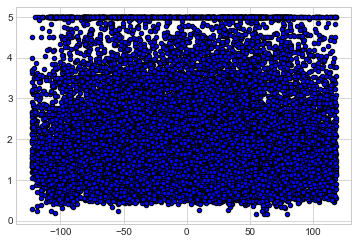

In [142]:
plt.scatter(X_comp,y, c='b', cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)

In [143]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

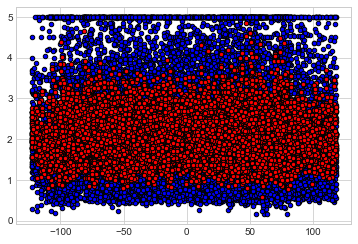

In [144]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, 
            edgecolors='k', s=20)